In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv
/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv
/kaggle/input/sentimental/vader_lexicon.txt


In [2]:
biden = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv', lineterminator='\n', 
                    parse_dates=True)
trump = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv', lineterminator='\n', 
                    parse_dates=True)

In [3]:
#converted tweet_created into a datetime object and made it into a new column
import datetime

datetime_obj = []

for elem in biden['created_at']:
    obj = datetime.datetime.strptime(elem, '%Y-%m-%d %H:%M:%S').date()
    datetime_obj.append(obj)
    
biden['datetime'] = datetime_obj
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,datetime
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,2020-10-15
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283,2020-10-15
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849,2020-10-15
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15


In [4]:
#selected rows that were between October 20 and November 3 inclusive
biden_date = biden[(biden['datetime'] >= datetime.date(2020, 10, 20)) & 
                   (biden['datetime'] <= datetime.date(2020, 11, 3))]
biden_date.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,datetime
65523,2020-10-20 00:00:00,1.318341e+18,Near 80% of capital gains in the #US go to the...,0.0,0.0,TweetDeck,2.370645e+08,The Corner,thecornerdoteu,#Spain and #EU economies in a global context. ...,...,Global,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 09:39:04.657209126,2020-10-20
65524,2020-10-20 00:00:00,1.318341e+18,Las elecciones de Estados Unidos que se realiz...,1.0,0.0,TweetDeck,1.754808e+07,Diario El Heraldo,diarioelheraldo,Noticias de Honduras,...,"Tegucigalpa, Honduras",14.105686,-87.204676,Tegucigalpa,Honduras,North America,Francisco Morazán,FM,2020-10-21 09:39:03.621554560,2020-10-20
65525,2020-10-20 00:00:00,1.318341e+18,"STU: ""Perhaps, you are, like me, amazed at the...",125.0,24.0,Twitter Web App,2.816105e+08,Varney & Co.,Varneyco,Airing Weekdays at 9AM ET on the Fox Business ...,...,New York,40.712728,-74.006015,New York,United States of America,North America,New York,NY,2020-10-21 09:39:04.139381843,2020-10-20
65526,2020-10-20 00:00:01,1.318341e+18,#Trump tells supporters: #Biden would surrende...,14.0,3.0,TweetDeck,1.925478e+08,Press TV,PressTV,Press TV is the first Iranian international ne...,...,"Tehran, Iran",35.689252,51.389600,Tehran,Iran,Asia,Tehran Province,NaN,2020-10-21 09:39:05.692863692,2020-10-20
65527,2020-10-20 00:00:01,1.318341e+18,How censorship REALLY works today — and how #T...,60.0,43.0,TweetDeck,3.018961e+09,Rebel News,RebelNewsOnline,Telling the other side of the story.,...,Canada and the world,61.066692,-107.991707,NaN,Canada,North America,NaN,NaN,2020-10-21 09:39:05.175036409,2020-10-20


In [5]:
#selected swing states
swing_biden = biden_date[(biden_date['state'] == 'Michigan') | (biden_date['state'] == 'Pennsylvania') | 
                    (biden_date['state'] == 'Wisonsin')]
swing_biden = swing_biden.reset_index()
swing_biden.head()

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,datetime
0,65546,2020-10-20 00:01:37,1.318342e+18,#HunterBiden is no doubt gonna sell out #JoeBi...,0.0,0.0,Twitter for Android,3.076956e+09,Chrisnjill,ChrisScaggs,...,"Philadelphia, PA",39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:39:16.049409353,2020-10-20
1,65600,2020-10-20 00:07:21,1.318343e+18,@cosmicastronut @NBCPhiladelphia I believe the...,0.0,0.0,Twitter for iPhone,1.232699e+18,Michael T,Michael37796981,...,"Philadelphia, PA",39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:39:44.529909919,2020-10-20
2,65618,2020-10-20 00:09:24,1.318344e+18,I’m guessing this isn’t the story Trump was re...,0.0,0.0,Twitter for iPhone,9.051601e+17,Age1979,AdrianneMerk,...,"Michigan, USA",43.621195,-84.682435,NaN,United States of America,North America,Michigan,MI,2020-10-21 09:39:55.404282863,2020-10-20
3,65653,2020-10-20 00:11:53,1.318344e+18,Philadelphians line up on last day(10/19) in P...,1.0,0.0,Twitter Web App,1.861165e+07,Donald D Groff,dgroff,...,Philadelphia,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:40:12.492583202,2020-10-20
4,65668,2020-10-20 00:13:52,1.318345e+18,#PresidentTrump &amp; #JoeBiden will have thei...,0.0,0.0,Twitter for Android,1.365812e+09,BreakinNewz,BreakinNewz01,...,Pennsylvania,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 09:40:20.259992448,2020-10-20


In [6]:
import re

hashtag = r'#[a-zA-Z]{1,}'

all_hashtags_biden = [] #contains all hashtags in every single tweet
hashtag_each_tweet = [] #extracted all hashtags from each tweet
for tweet in swing_biden['tweet']:
    array_hash = re.findall(hashtag, tweet)
    hashtag_each_tweet.append(array_hash)
    for elem in array_hash:
        all_hashtags_biden.append(elem)

In [7]:
from collections import Counter

counter_hash_biden = Counter(all_hashtags_biden)

In [8]:
most_common = sorted(counter_hash_biden.items(), key = lambda x: x[1], reverse = True)

In [9]:
keys_biden = np.array([*counter_hash_biden.keys()])

text_hash = ''
for elem in keys_biden:
    text_hash += ' '
    text_hash += elem

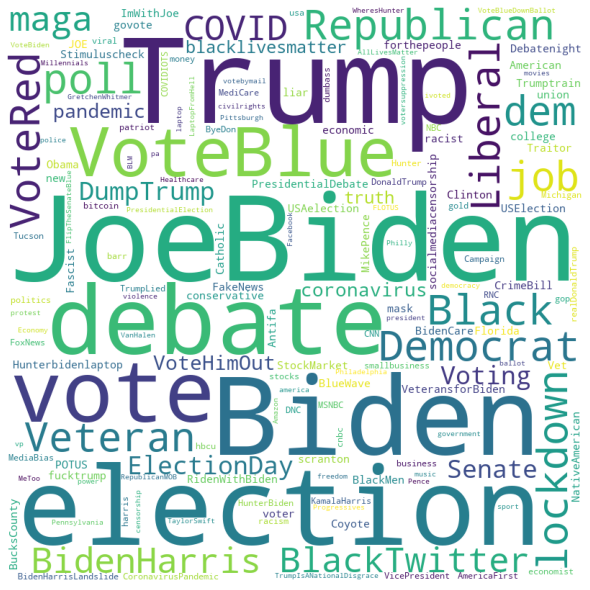

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                     min_font_size = 10).generate(text_hash)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [11]:
#used TextBlob sentimental analysis library to get polarity score of every single tweet
from textblob import TextBlob

each_polarity = []

for elem in swing_biden['tweet']:
    blob = TextBlob(elem)
    polarity = blob.sentiment.polarity
    each_polarity.append(polarity)   

In [12]:
#created a new column that had the polarity score of each tweet with TextBlob
swing_biden['polarity_textblob'] = each_polarity
swing_biden.head()

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,lat,long,city,country,continent,state,state_code,collected_at,datetime,polarity_textblob
0,65546,2020-10-20 00:01:37,1.318342e+18,#HunterBiden is no doubt gonna sell out #JoeBi...,0.0,0.0,Twitter for Android,3.076956e+09,Chrisnjill,ChrisScaggs,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:39:16.049409353,2020-10-20,-0.100000
1,65600,2020-10-20 00:07:21,1.318343e+18,@cosmicastronut @NBCPhiladelphia I believe the...,0.0,0.0,Twitter for iPhone,1.232699e+18,Michael T,Michael37796981,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:39:44.529909919,2020-10-20,0.217614
2,65618,2020-10-20 00:09:24,1.318344e+18,I’m guessing this isn’t the story Trump was re...,0.0,0.0,Twitter for iPhone,9.051601e+17,Age1979,AdrianneMerk,...,43.621195,-84.682435,NaN,United States of America,North America,Michigan,MI,2020-10-21 09:39:55.404282863,2020-10-20,0.000000
3,65653,2020-10-20 00:11:53,1.318344e+18,Philadelphians line up on last day(10/19) in P...,1.0,0.0,Twitter Web App,1.861165e+07,Donald D Groff,dgroff,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:40:12.492583202,2020-10-20,-0.150000
4,65668,2020-10-20 00:13:52,1.318345e+18,#PresidentTrump &amp; #JoeBiden will have thei...,0.0,0.0,Twitter for Android,1.365812e+09,BreakinNewz,BreakinNewz01,...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 09:40:20.259992448,2020-10-20,0.000000


In [13]:
swing_biden_textblob = swing_biden.copy()
swing_biden_textblob.head()

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,lat,long,city,country,continent,state,state_code,collected_at,datetime,polarity_textblob
0,65546,2020-10-20 00:01:37,1.318342e+18,#HunterBiden is no doubt gonna sell out #JoeBi...,0.0,0.0,Twitter for Android,3.076956e+09,Chrisnjill,ChrisScaggs,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:39:16.049409353,2020-10-20,-0.100000
1,65600,2020-10-20 00:07:21,1.318343e+18,@cosmicastronut @NBCPhiladelphia I believe the...,0.0,0.0,Twitter for iPhone,1.232699e+18,Michael T,Michael37796981,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:39:44.529909919,2020-10-20,0.217614
2,65618,2020-10-20 00:09:24,1.318344e+18,I’m guessing this isn’t the story Trump was re...,0.0,0.0,Twitter for iPhone,9.051601e+17,Age1979,AdrianneMerk,...,43.621195,-84.682435,NaN,United States of America,North America,Michigan,MI,2020-10-21 09:39:55.404282863,2020-10-20,0.000000
3,65653,2020-10-20 00:11:53,1.318344e+18,Philadelphians line up on last day(10/19) in P...,1.0,0.0,Twitter Web App,1.861165e+07,Donald D Groff,dgroff,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:40:12.492583202,2020-10-20,-0.150000
4,65668,2020-10-20 00:13:52,1.318345e+18,#PresidentTrump &amp; #JoeBiden will have thei...,0.0,0.0,Twitter for Android,1.365812e+09,BreakinNewz,BreakinNewz01,...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 09:40:20.259992448,2020-10-20,0.000000


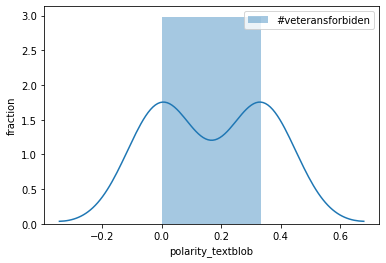

In [14]:
import seaborn as sns

veteran_for_biden = swing_biden_textblob[swing_biden_textblob['tweet'].str.contains('#veteransforbiden')]

plt.ylabel('fraction')

sns.distplot(veteran_for_biden['polarity_textblob'], label = '#veteransforbiden');
plt.legend();

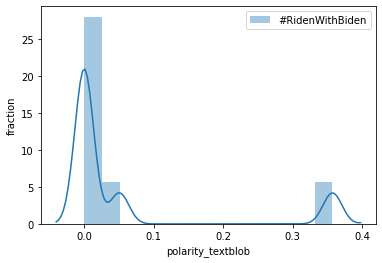

In [15]:
riden_with_biden = swing_biden_textblob[swing_biden_textblob['tweet'].str.contains('#RidenWithBiden')]

plt.ylabel('fraction')

sns.distplot(riden_with_biden['polarity_textblob'], label = '#RidenWithBiden');
plt.legend();

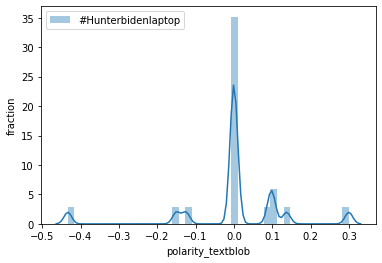

In [16]:
hunter_biden_laptop = swing_biden_textblob[swing_biden_textblob['tweet'].str.contains('#Hunterbidenlaptop')]

plt.ylabel('fraction')

sns.distplot(hunter_biden_laptop['polarity_textblob'], label = '#Hunterbidenlaptop');
plt.legend();

In [17]:
swing_biden_vader = swing_biden.copy()
swing_biden_vader.head()

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,lat,long,city,country,continent,state,state_code,collected_at,datetime,polarity_textblob
0,65546,2020-10-20 00:01:37,1.318342e+18,#HunterBiden is no doubt gonna sell out #JoeBi...,0.0,0.0,Twitter for Android,3.076956e+09,Chrisnjill,ChrisScaggs,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:39:16.049409353,2020-10-20,-0.100000
1,65600,2020-10-20 00:07:21,1.318343e+18,@cosmicastronut @NBCPhiladelphia I believe the...,0.0,0.0,Twitter for iPhone,1.232699e+18,Michael T,Michael37796981,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:39:44.529909919,2020-10-20,0.217614
2,65618,2020-10-20 00:09:24,1.318344e+18,I’m guessing this isn’t the story Trump was re...,0.0,0.0,Twitter for iPhone,9.051601e+17,Age1979,AdrianneMerk,...,43.621195,-84.682435,NaN,United States of America,North America,Michigan,MI,2020-10-21 09:39:55.404282863,2020-10-20,0.000000
3,65653,2020-10-20 00:11:53,1.318344e+18,Philadelphians line up on last day(10/19) in P...,1.0,0.0,Twitter Web App,1.861165e+07,Donald D Groff,dgroff,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:40:12.492583202,2020-10-20,-0.150000
4,65668,2020-10-20 00:13:52,1.318345e+18,#PresidentTrump &amp; #JoeBiden will have thei...,0.0,0.0,Twitter for Android,1.365812e+09,BreakinNewz,BreakinNewz01,...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 09:40:20.259992448,2020-10-20,0.000000


In [18]:
#vader sentimenal analysis
vader = pd.read_csv('/kaggle/input/sentimental/vader_lexicon.txt', sep = '\t', index_col = 0, 
                   header = None).drop([2,3], axis = 1).rename(columns={1: 'polarity'})

#lower all tweet
# swing_biden_vader['tweet'] = swing_biden_vader['tweet'].str.lower()

#Get rid of all punctutations
punct_re = r'[^(\w)(\s)]'
swing_biden_vader['no_punc'] = swing_biden_vader['tweet'].str.lower().replace(punct_re, ' ', regex = True) 

#Make new dataframe
tidy_format = pd.DataFrame(swing_biden_vader['no_punc'].str.split(expand = True).stack()).reset_index(level = 1).rename(columns = {'level_1' : 'num', 0 : 'word'})

tidy_format2 = tidy_format
tidy_format2['index'] = tidy_format.index

#make polarity column
swing_biden_vader['polarity_vader'] = tidy_format2.merge(vader, how = 'left', left_on = 'word', right_on = 0).fillna(0).groupby('index').sum()['polarity']

In [19]:
swing_biden_vader

,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,city,country,continent,state,state_code,collected_at,datetime,polarity_textblob,no_punc,polarity_vader
0,65546,2020-10-20 00:01:37,1.318342e+18,#HunterBiden is no doubt gonna sell out #JoeBi...,0.0,0.0,Twitter for Android,3.076956e+09,Chrisnjill,ChrisScaggs,...,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:39:16.049409353,2020-10-20,-0.100000,hunterbiden is no doubt gonna sell out joebi...,-5.2
1,65600,2020-10-20 00:07:21,1.318343e+18,@cosmicastronut @NBCPhiladelphia I believe the...,0.0,0.0,Twitter for iPhone,1.232699e+18,Michael T,Michael37796981,...,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:39:44.529909919,2020-10-20,0.217614,cosmicastronut nbcphiladelphia i believe the...,-2.1
2,65618,2020-10-20 00:09:24,1.318344e+18,I’m guessing this isn’t the story Trump was re...,0.0,0.0,Twitter for iPhone,9.051601e+17,Age1979,AdrianneMerk,...,NaN,United States of America,North America,Michigan,MI,2020-10-21 09:39:55.404282863,2020-10-20,0.000000,i m guessing this isn t the story trump was re...,0.0
3,65653,2020-10-20 00:11:53,1.318344e+18,Philadelphians line up on last day(10/19) in P...,1.0,0.0,Twitter Web App,1.861165e+07,Donald D Groff,dgroff,...,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 09:40:12.492583202,2020-10-20,-0.150000,philadelphians line up on last day(10 19) in p...,0.0
4,65668,2020-10-20 00:13:52,1.318345e+18,#PresidentTrump &amp; #JoeBiden will have thei...,0.0,0.0,Twitter for Android,1.365812e+09,BreakinNewz,BreakinNewz01,...,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 09:40:20.259992448,2020-10-20,0.000000,presidenttrump amp joebiden will have thei...,-1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,351920,2020-11-03 23:42:28,1.323773e+18,#EarlyVoting in #Kentucky leaning towards #Joe...,0.0,0.0,Twitter for iPad,2.930618e+08,Nathan Rhea,NathanRhea,...,Pittsburgh,United States of America,North America,Pennsylvania,PA,2020-11-04 10:15:53.735013,2020-11-03,0.500000,earlyvoting in kentucky leaning towards joe...,1.9
4439,352156,2020-11-03 23:48:11,1.323774e+18,@MollyJongFast I can't even.... #ElectionNig...,1.0,0.0,Twitter Web App,4.095439e+07,Sue,suekron,...,NaN,United States of America,North America,Pennsylvania,PA,2020-11-04 10:15:52.280040,2020-11-03,0.000000,mollyjongfast i can t even electionnig...,0.0
4440,352203,2020-11-03 23:49:18,1.323774e+18,Remember people as that election map lights up...,0.0,0.0,Twitter for Android,3.688179e+07,James Davis Save America #BidenHarris2020 #M4A,babylon151,...,Erie,United States of America,North America,Pennsylvania,PA,2020-11-04 09:42:31.392978,2020-11-03,0.500000,remember people as that election map lights up...,-0.6
4441,352402,2020-11-03 23:53:57,1.323775e+18,Current status. #ElectionDay #ElectionNight #E...,2.0,0.0,Twitter for iPhone,1.213145e+18,Duchess_of_Yinz,DuchessofYinz,...,NaN,United States of America,North America,Pennsylvania,PA,2020-11-04 09:42:30.369235,2020-11-03,0.000000,current status electionday electionnight e...,0.0


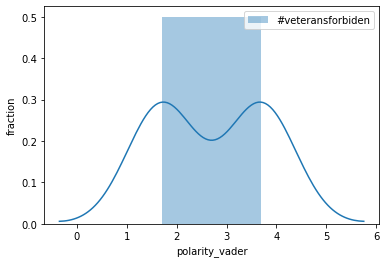

In [20]:
veteran_for_biden = swing_biden_vader[swing_biden_vader['tweet'].str.contains('#veteransforbiden')]

plt.ylabel('fraction')

sns.distplot(veteran_for_biden['polarity_vader'], label = '#veteransforbiden');
plt.legend();

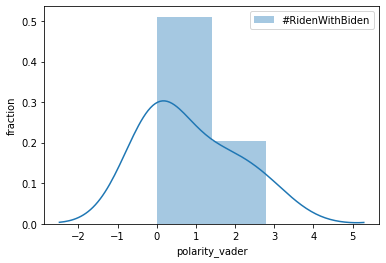

In [21]:
riden_with_biden = swing_biden_vader[swing_biden_vader['tweet'].str.contains('#RidenWithBiden')]

plt.ylabel('fraction')

sns.distplot(riden_with_biden['polarity_vader'], label = '#RidenWithBiden');
plt.legend();

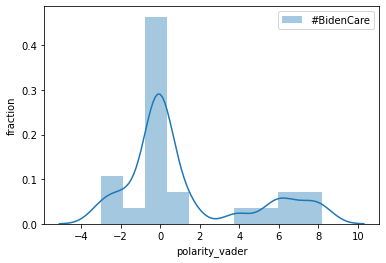

In [22]:
biden_care = swing_biden_vader[swing_biden_vader['tweet'].str.contains('#BidenCare')]

plt.ylabel('fraction')

sns.distplot(biden_care['polarity_vader'], label = '#BidenCare');
plt.legend();

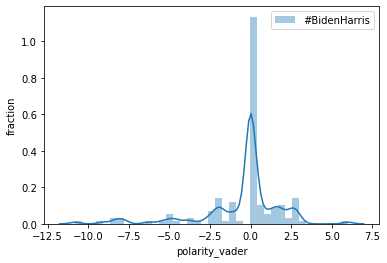

In [23]:
biden_care = swing_biden_vader[swing_biden_vader['tweet'].str.contains('#HunterBiden')]

plt.ylabel('fraction')

sns.distplot(biden_care['polarity_vader'], label = '#BidenHarris');
plt.legend();

In [24]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [25]:
datetime_obj_trump = []

for elem in trump['created_at']:
    obj = datetime.datetime.strptime(elem, '%Y-%m-%d %H:%M:%S').date()
    datetime_obj_trump.append(obj)
    
#created new column that contains datetime object
trump['datetime'] = datetime_obj_trump

#got rows between October 20 and November 3 inclusive
trump_date = trump[(trump['datetime'] >= datetime.date(2020, 10, 20)) & 
                   (trump['datetime'] <= datetime.date(2020, 11, 3))]

#got only swing states
swing_trump = trump_date[(trump_date['state'] == 'Michigan') | (trump_date['state'] == 'Pennsylvania') | 
                    (trump_date['state'] == 'Wisonsin')]
swing_trump = swing_trump.reset_index()

In [26]:
all_hashtags_trump = [] #contains all hashtags in every sing tweet
hashtag_each_tweet_trump = [] #extracted all hashtags from each tweet
for tweet in swing_trump['tweet']:
    array_hash = re.findall(hashtag, tweet)
    hashtag_each_tweet_trump.append(array_hash)
    for elem in array_hash:
        all_hashtags_trump.append(elem)

In [27]:
counter_hash_trump = Counter(all_hashtags_trump)

keys_trump = np.array([*counter_hash_trump.keys()])

text_hash_trump = ''
for elem in keys_trump:
    text_hash_trump += ' '
    text_hash_trump += elem

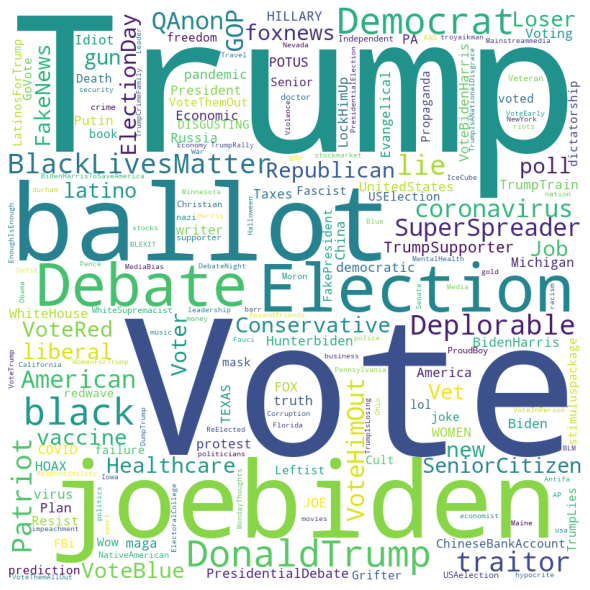

In [28]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                     min_font_size = 10).generate(text_hash_trump)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [29]:
each_polarity_trump = []

for elem in swing_trump['tweet']:
    blob = TextBlob(elem)
    polarity = blob.sentiment.polarity
    each_polarity_trump.append(polarity)  
    
swing_trump['polarity_textblob'] = each_polarity_trump

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
swing_trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,lat,long,city,country,continent,state,state_code,collected_at,datetime,polarity_textblob
97498,2020-10-20 00:00:45,1.318341e+18,@ReallyAmerican1 #Trump IsCompromised,0.0,0.0,Twitter for Android,7.319813e+17,Sandy Tompkins,sandytompkins4,I want to live in a world where we all get alo...,...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:10.544144517,2020-10-20,0.000000
97533,2020-10-20 00:02:56,1.318342e+18,"Just another reminder that glaring racism, xen...",0.0,0.0,Twitter Web App,3.214701e+08,Brion J. Shreffler,brion_j,Food & music writer. Stories on the Philly foo...,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:23.606723081,2020-10-20,0.100000
97622,2020-10-20 00:07:21,1.318343e+18,@cosmicastronut @NBCPhiladelphia I believe the...,0.0,0.0,Twitter for iPhone,1.232699e+18,Michael T,Michael37796981,#Catholic #libertarian - had an old account th...,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:56.822994285,2020-10-20,0.217614
97623,2020-10-20 00:07:21,1.318343e+18,The things you find on Facebook...Hope the #Be...,1.0,1.0,Twitter for Android,4.245705e+09,cathy k,CathyCeekay,"Wanna-be beach bum; What goes around, comes ar...",...,40.441694,-79.990086,Pittsburgh,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:57.196210815,2020-10-20,0.000000
97680,2020-10-20 00:10:44,1.318344e+18,@realDonaldTrump @60Minutes With respect Mr #T...,0.0,0.0,Twitter Web App,7.011276e+17,ChemPhD1990,ChemPhD1990,NaN,...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 10:18:18.842769577,2020-10-20,0.150000


In [31]:
swing_trump_textblob = swing_trump.copy()
swing_trump_textblob.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,lat,long,city,country,continent,state,state_code,collected_at,datetime,polarity_textblob
97498,2020-10-20 00:00:45,1.318341e+18,@ReallyAmerican1 #Trump IsCompromised,0.0,0.0,Twitter for Android,7.319813e+17,Sandy Tompkins,sandytompkins4,I want to live in a world where we all get alo...,...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:10.544144517,2020-10-20,0.000000
97533,2020-10-20 00:02:56,1.318342e+18,"Just another reminder that glaring racism, xen...",0.0,0.0,Twitter Web App,3.214701e+08,Brion J. Shreffler,brion_j,Food & music writer. Stories on the Philly foo...,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:23.606723081,2020-10-20,0.100000
97622,2020-10-20 00:07:21,1.318343e+18,@cosmicastronut @NBCPhiladelphia I believe the...,0.0,0.0,Twitter for iPhone,1.232699e+18,Michael T,Michael37796981,#Catholic #libertarian - had an old account th...,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:56.822994285,2020-10-20,0.217614
97623,2020-10-20 00:07:21,1.318343e+18,The things you find on Facebook...Hope the #Be...,1.0,1.0,Twitter for Android,4.245705e+09,cathy k,CathyCeekay,"Wanna-be beach bum; What goes around, comes ar...",...,40.441694,-79.990086,Pittsburgh,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:57.196210815,2020-10-20,0.000000
97680,2020-10-20 00:10:44,1.318344e+18,@realDonaldTrump @60Minutes With respect Mr #T...,0.0,0.0,Twitter Web App,7.011276e+17,ChemPhD1990,ChemPhD1990,NaN,...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 10:18:18.842769577,2020-10-20,0.150000


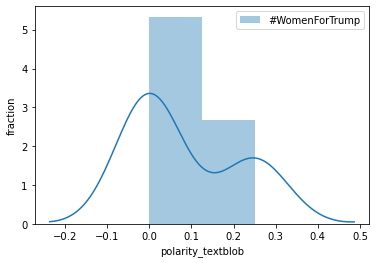

In [32]:
women_trump = swing_trump_textblob[swing_trump_textblob['tweet'].str.contains('#WomenForTrump')]

plt.ylabel('fraction')

sns.distplot(women_trump['polarity_textblob'], label = '#WomenForTrump');
plt.legend();

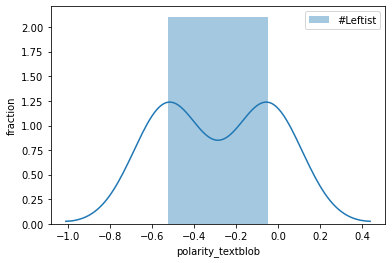

In [33]:
leftist = swing_trump_textblob[swing_trump_textblob['tweet'].str.contains('#Leftist')]

plt.ylabel('fraction')

sns.distplot(leftist['polarity_textblob'], label = '#Leftist');
plt.legend();

In [34]:
swing_trump_vader = swing_trump.copy()
swing_trump_vader.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,lat,long,city,country,continent,state,state_code,collected_at,datetime,polarity_textblob
97498,2020-10-20 00:00:45,1.318341e+18,@ReallyAmerican1 #Trump IsCompromised,0.0,0.0,Twitter for Android,7.319813e+17,Sandy Tompkins,sandytompkins4,I want to live in a world where we all get alo...,...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:10.544144517,2020-10-20,0.000000
97533,2020-10-20 00:02:56,1.318342e+18,"Just another reminder that glaring racism, xen...",0.0,0.0,Twitter Web App,3.214701e+08,Brion J. Shreffler,brion_j,Food & music writer. Stories on the Philly foo...,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:23.606723081,2020-10-20,0.100000
97622,2020-10-20 00:07:21,1.318343e+18,@cosmicastronut @NBCPhiladelphia I believe the...,0.0,0.0,Twitter for iPhone,1.232699e+18,Michael T,Michael37796981,#Catholic #libertarian - had an old account th...,...,39.952724,-75.163526,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:56.822994285,2020-10-20,0.217614
97623,2020-10-20 00:07:21,1.318343e+18,The things you find on Facebook...Hope the #Be...,1.0,1.0,Twitter for Android,4.245705e+09,cathy k,CathyCeekay,"Wanna-be beach bum; What goes around, comes ar...",...,40.441694,-79.990086,Pittsburgh,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:57.196210815,2020-10-20,0.000000
97680,2020-10-20 00:10:44,1.318344e+18,@realDonaldTrump @60Minutes With respect Mr #T...,0.0,0.0,Twitter Web App,7.011276e+17,ChemPhD1990,ChemPhD1990,NaN,...,40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 10:18:18.842769577,2020-10-20,0.150000


In [35]:
#make new column with lowercase tweet and no punctutations
swing_trump_vader['no_punc'] = swing_trump_vader['tweet'].str.lower().replace(punct_re, ' ', regex = True) 

#Make new dataframe
tidy_format_trump = pd.DataFrame(swing_trump_vader['no_punc'].str.split(expand = True).stack()).reset_index(level = 1).rename(columns = {'level_1' : 'num', 0 : 'word'})

tidy_format2_trump = tidy_format_trump
tidy_format2_trump['index'] = tidy_format_trump.index

#make polarity column
swing_trump_vader['polarity_vader'] = tidy_format2_trump.merge(vader, how = 'left', left_on = 'word', right_on = 0).fillna(0).groupby('index').sum()['polarity']

In [36]:
swing_trump_vader.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,city,country,continent,state,state_code,collected_at,datetime,polarity_textblob,no_punc,polarity_vader
97498,2020-10-20 00:00:45,1.318341e+18,@ReallyAmerican1 #Trump IsCompromised,0.0,0.0,Twitter for Android,7.319813e+17,Sandy Tompkins,sandytompkins4,I want to live in a world where we all get alo...,...,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:10.544144517,2020-10-20,0.000000,reallyamerican1 trump iscompromised,0.0
97533,2020-10-20 00:02:56,1.318342e+18,"Just another reminder that glaring racism, xen...",0.0,0.0,Twitter Web App,3.214701e+08,Brion J. Shreffler,brion_j,Food & music writer. Stories on the Philly foo...,...,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:23.606723081,2020-10-20,0.100000,just another reminder that glaring racism xen...,-10.1
97622,2020-10-20 00:07:21,1.318343e+18,@cosmicastronut @NBCPhiladelphia I believe the...,0.0,0.0,Twitter for iPhone,1.232699e+18,Michael T,Michael37796981,#Catholic #libertarian - had an old account th...,...,Philadelphia,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:56.822994285,2020-10-20,0.217614,cosmicastronut nbcphiladelphia i believe the...,-2.1
97623,2020-10-20 00:07:21,1.318343e+18,The things you find on Facebook...Hope the #Be...,1.0,1.0,Twitter for Android,4.245705e+09,cathy k,CathyCeekay,"Wanna-be beach bum; What goes around, comes ar...",...,Pittsburgh,United States of America,North America,Pennsylvania,PA,2020-10-21 10:17:57.196210815,2020-10-20,0.000000,the things you find on facebook hope the be...,0.9
97680,2020-10-20 00:10:44,1.318344e+18,@realDonaldTrump @60Minutes With respect Mr #T...,0.0,0.0,Twitter Web App,7.011276e+17,ChemPhD1990,ChemPhD1990,NaN,...,NaN,United States of America,North America,Pennsylvania,PA,2020-10-21 10:18:18.842769577,2020-10-20,0.150000,realdonaldtrump 60minutes with respect mr t...,-0.2


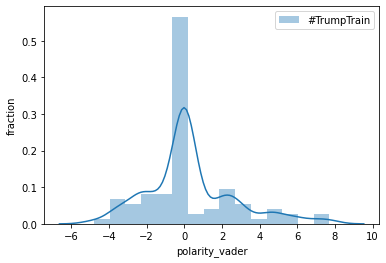

In [37]:
trumptrain = swing_trump_vader[swing_trump_vader['tweet'].str.contains('#TrumpTrain')]

plt.ylabel('fraction')

sns.distplot(trumptrain['polarity_vader'], label = '#TrumpTrain');
plt.legend();

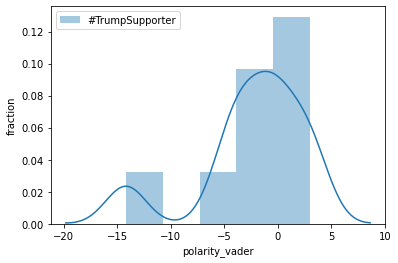

In [38]:
trump_supporter = swing_trump_vader[swing_trump_vader['tweet'].str.contains('#TrumpSupporter')]

plt.ylabel('fraction')

sns.distplot(trump_supporter['polarity_vader'], label = '#TrumpSupporter');
plt.legend();

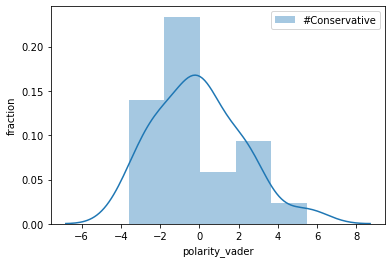

In [39]:
conservative = swing_trump_vader[swing_trump_vader['tweet'].str.contains('#Conservative')]

plt.ylabel('fraction')

sns.distplot(conservative['polarity_vader'], label = '#Conservative');
plt.legend();

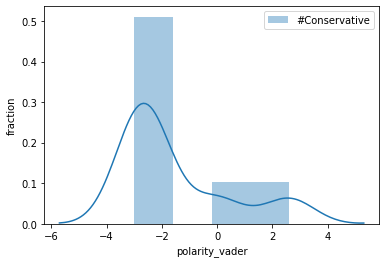

In [40]:
conservative = swing_trump_vader[swing_trump_vader['tweet'].str.contains('#Idiot')]

plt.ylabel('fraction')

sns.distplot(conservative['polarity_vader'], label = '#Conservative');
plt.legend();

In [43]:
swing_biden.columns

Index(['index', 'created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count',
       'source', 'user_id', 'user_name', 'user_screen_name',
       'user_description', 'user_join_date', 'user_followers_count',
       'user_location', 'lat', 'long', 'city', 'country', 'continent', 'state',
       'state_code', 'collected_at', 'datetime', 'polarity_textblob'],
      dtype='object')

In [45]:
swing_trump = swing_trump.reset_index()

In [46]:
swing_trump.columns

Index(['index', 'created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count',
       'source', 'user_id', 'user_name', 'user_screen_name',
       'user_description', 'user_join_date', 'user_followers_count',
       'user_location', 'lat', 'long', 'city', 'country', 'continent', 'state',
       'state_code', 'collected_at', 'datetime', 'polarity_textblob'],
      dtype='object')